In [32]:
import os
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline
%precision 3

'%.3f'

In [33]:
from sklearn import linear_model

In [34]:
data_base_path = './data/chap3/'

In [35]:
student_data_math = pd.read_csv(os.path.join(data_base_path, 'student-mat.csv'), sep=';')

In [36]:
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [37]:
student_data_math.groupby('sex')['absences'].mean()

sex
F    6.216346
M    5.144385
Name: absences, dtype: float64

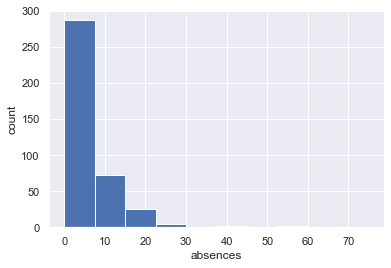

In [38]:
plt.hist(student_data_math['absences'])
plt.xlabel('absences')
plt.ylabel('count')
plt.grid(True)

In [46]:
print('平均値:', student_data_math['absences'].mean())
print('中央値:', student_data_math['absences'].median())
print('最頻値:', student_data_math['absences'].mode())
print('分散:', student_data_math['absences'].std())
student_data_math['absences'].describe()

平均値: 5.708860759493671
中央値: 4.0
最頻値: 0    0
dtype: int64
分散: 8.00309568710818


count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

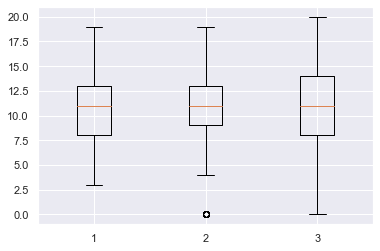

In [50]:
plt.boxplot([student_data_math['G1'], student_data_math['G2'], student_data_math['G3']])
plt.grid(True)

In [52]:
# 変動係数(CV)
student_data_math.std() / student_data_math.mean()

age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

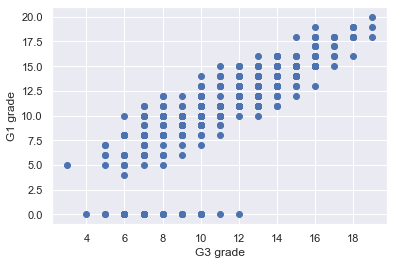

In [58]:
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')
plt.xlabel('G3 grade')
plt.ylabel('G1 grade')
plt.grid(True)

In [60]:
sp.stats.pearsonr(student_data_math['G1'], student_data_math['G3'])

(0.8014679320174141, 9.001430312277354e-90)

In [63]:
#sns.pairplot(student_data_math[['Dalc', 'Walc', 'G1', 'G3']])
#plt.grid(True)

### 練習問題3-1

In [70]:
student_data_por = pd.read_csv(os.path.join(data_base_path, 'student-por.csv'), sep=';')

In [71]:
student_data_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


### 練習問題3-2

In [77]:
student_data_merge = pd.merge(student_data_math, student_data_por, on=['school', 'sex', 'age', 'address', 'Medu', 'Fedu'], suffixes=('_math', '_por'))

In [78]:
student_data_merge.describe()

,age,Medu,Fedu,traveltime_math,studytime_math,failures_math,famrel_math,freetime_math,goout_math,Dalc_math,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
count,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,...,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000
mean,16.417555,2.923511,2.709091,1.350470,2.044514,0.229467,3.954232,3.207524,3.136677,1.468966,...,3.967398,3.181818,3.152978,1.460188,2.245141,3.694044,3.988715,12.109718,12.252038,12.589342
std,1.088294,1.070498,1.079354,0.624212,0.824591,0.596947,0.918805,0.981737,1.087803,0.917970,...,0.910108,0.980766,1.126468,0.908009,1.269058,1.389306,4.940283,2.467073,2.458014,2.733456
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.500000,0.000000,4.000000,3.000000,2.000000,1.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000
50%,16.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


### 練習問題3-3

In [81]:
#sns.pairplot(student_data_merge[['Medu', 'Fedu', 'G3_math']])

Text(0, 0.5, 'G3')

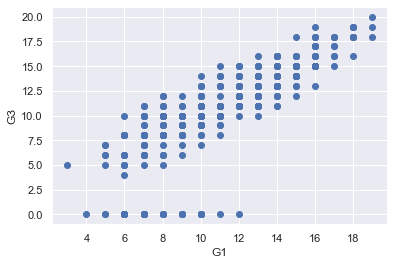

In [85]:
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')
plt.xlabel('G1')
plt.ylabel('G3')

In [86]:
reg = linear_model.LinearRegression()

In [88]:
x = student_data_math.loc[:, ['G1']].values

In [91]:
y = student_data_math.loc[:, ['G3']].values

In [92]:
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
print('回帰係数:', reg.coef_)
print('切片:', reg.intercept_)

回帰係数: [[1.106]]
切片: [-1.653]


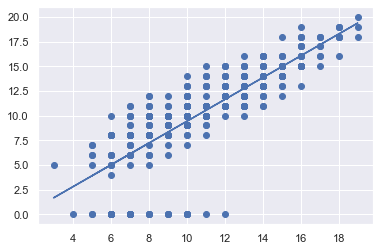

In [95]:
plt.scatter(x, y)
plt.plot(x, reg.predict(x))

In [96]:
print('決定係数:', reg.score(x, y))

決定係数: 0.6423508460522701


### 練習問題3-4

In [97]:
x = student_data_por.loc[:, ['G1']].values
y = student_data_por.loc[:, ['G3']].values

In [98]:
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
print('回帰係数:', reg.coef_)
print('切片:', reg.intercept_)
print('決定係数:', reg.score(x, y))

回帰係数: [[0.973]]
切片: [0.82]
決定係数: 0.6829156800171085


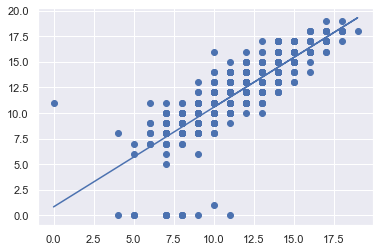

In [101]:
plt.scatter(x, y)
plt.plot(x, reg.predict(x))

### 練習問題3-6

In [102]:
x = student_data_por.loc[:, ['absences']].values
y = student_data_por.loc[:, ['G3']].values

In [103]:
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
print('回帰係数:', reg.coef_)
print('切片:', reg.intercept_)
print('決定係数:', reg.score(x, y))

回帰係数: [[-0.064]]
切片: [12.139]
決定係数: 0.008350131955637385


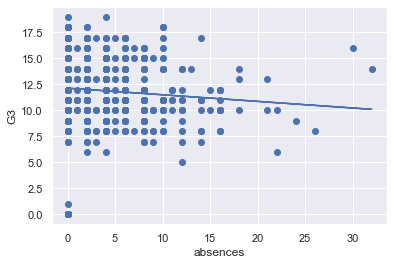

In [107]:
plt.scatter(x, y)
plt.xlabel('absences')
plt.ylabel('G3')
plt.plot(x, reg.predict(x))